In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
df = pd.read_csv("heart_disease_uci 2.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
columns = ['id', 'age', 'sex', 'study_location', 'Chest_pain_type', 'resting_bloodpressure', 'cholestrol', 'fasting_bloodsugar',
       'restecg', 'thalch', 'exang', 'st_depression', 'slope', 'ca', 'thal', 'target']

In [7]:
df.shape

(920, 16)

In [22]:
df.isnull().sum()/len(df)

id          0.000000
age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
num         0.000000
dtype: float64

In [9]:
df[df.duplicated()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [23]:
df.drop('id', axis=1, inplace=True)

#### Drop missing values

* The standard in most project is to drop any missing values greather than 30% of the total data, except:

* The feature is very important.

* The missing values data, can be traced and collected. (e.g a missing location but we observe that we have the longitude and latitude data without missing)

* Relying on Gradient boosting models (Lightgbm, Xgboost, and Catboost)



In [76]:
(df.isnull().sum()/len(df)*100).reset_index().set_index('index')

,0
index,
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalch,5.978261


Text(0, 0.5, 'Columns')

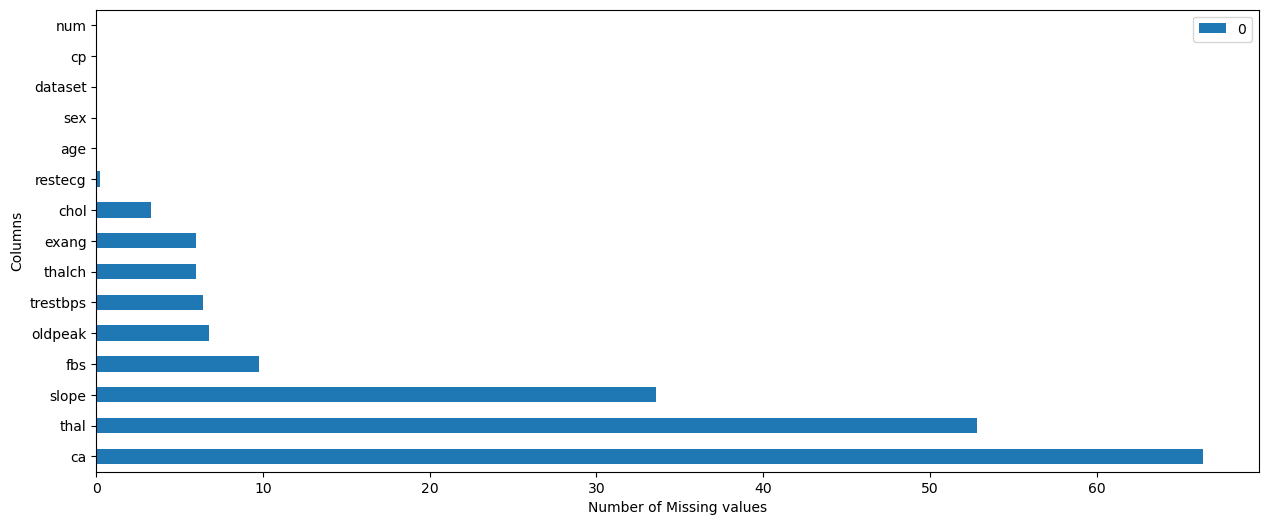

In [78]:
(df.isnull().sum()/len(df)*100).reset_index().set_index('index').sort_values(by=0, ascending=False).plot(kind='barh', 
                                                                                                         figsize=(15,6))

plt.xlabel('Number of Missing values')
plt.ylabel('Columns')

In [79]:
df1 = df.drop(['ca','thal','slope'], axis=1)

In [80]:
to_drop = ['ca', 'thal','slope']

assert to_drop not in list(df1.columns)

In [83]:
df1.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


<AxesSubplot:xlabel='sex', ylabel='count'>

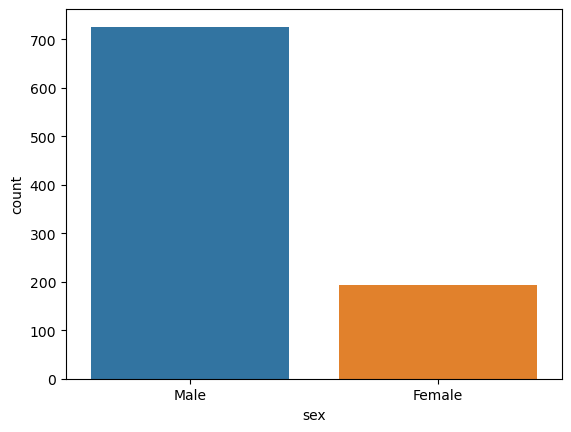

In [88]:
sns.countplot(x='sex', data=df1)

In [109]:
list(df1.select_dtypes(include='O').columns)

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang']

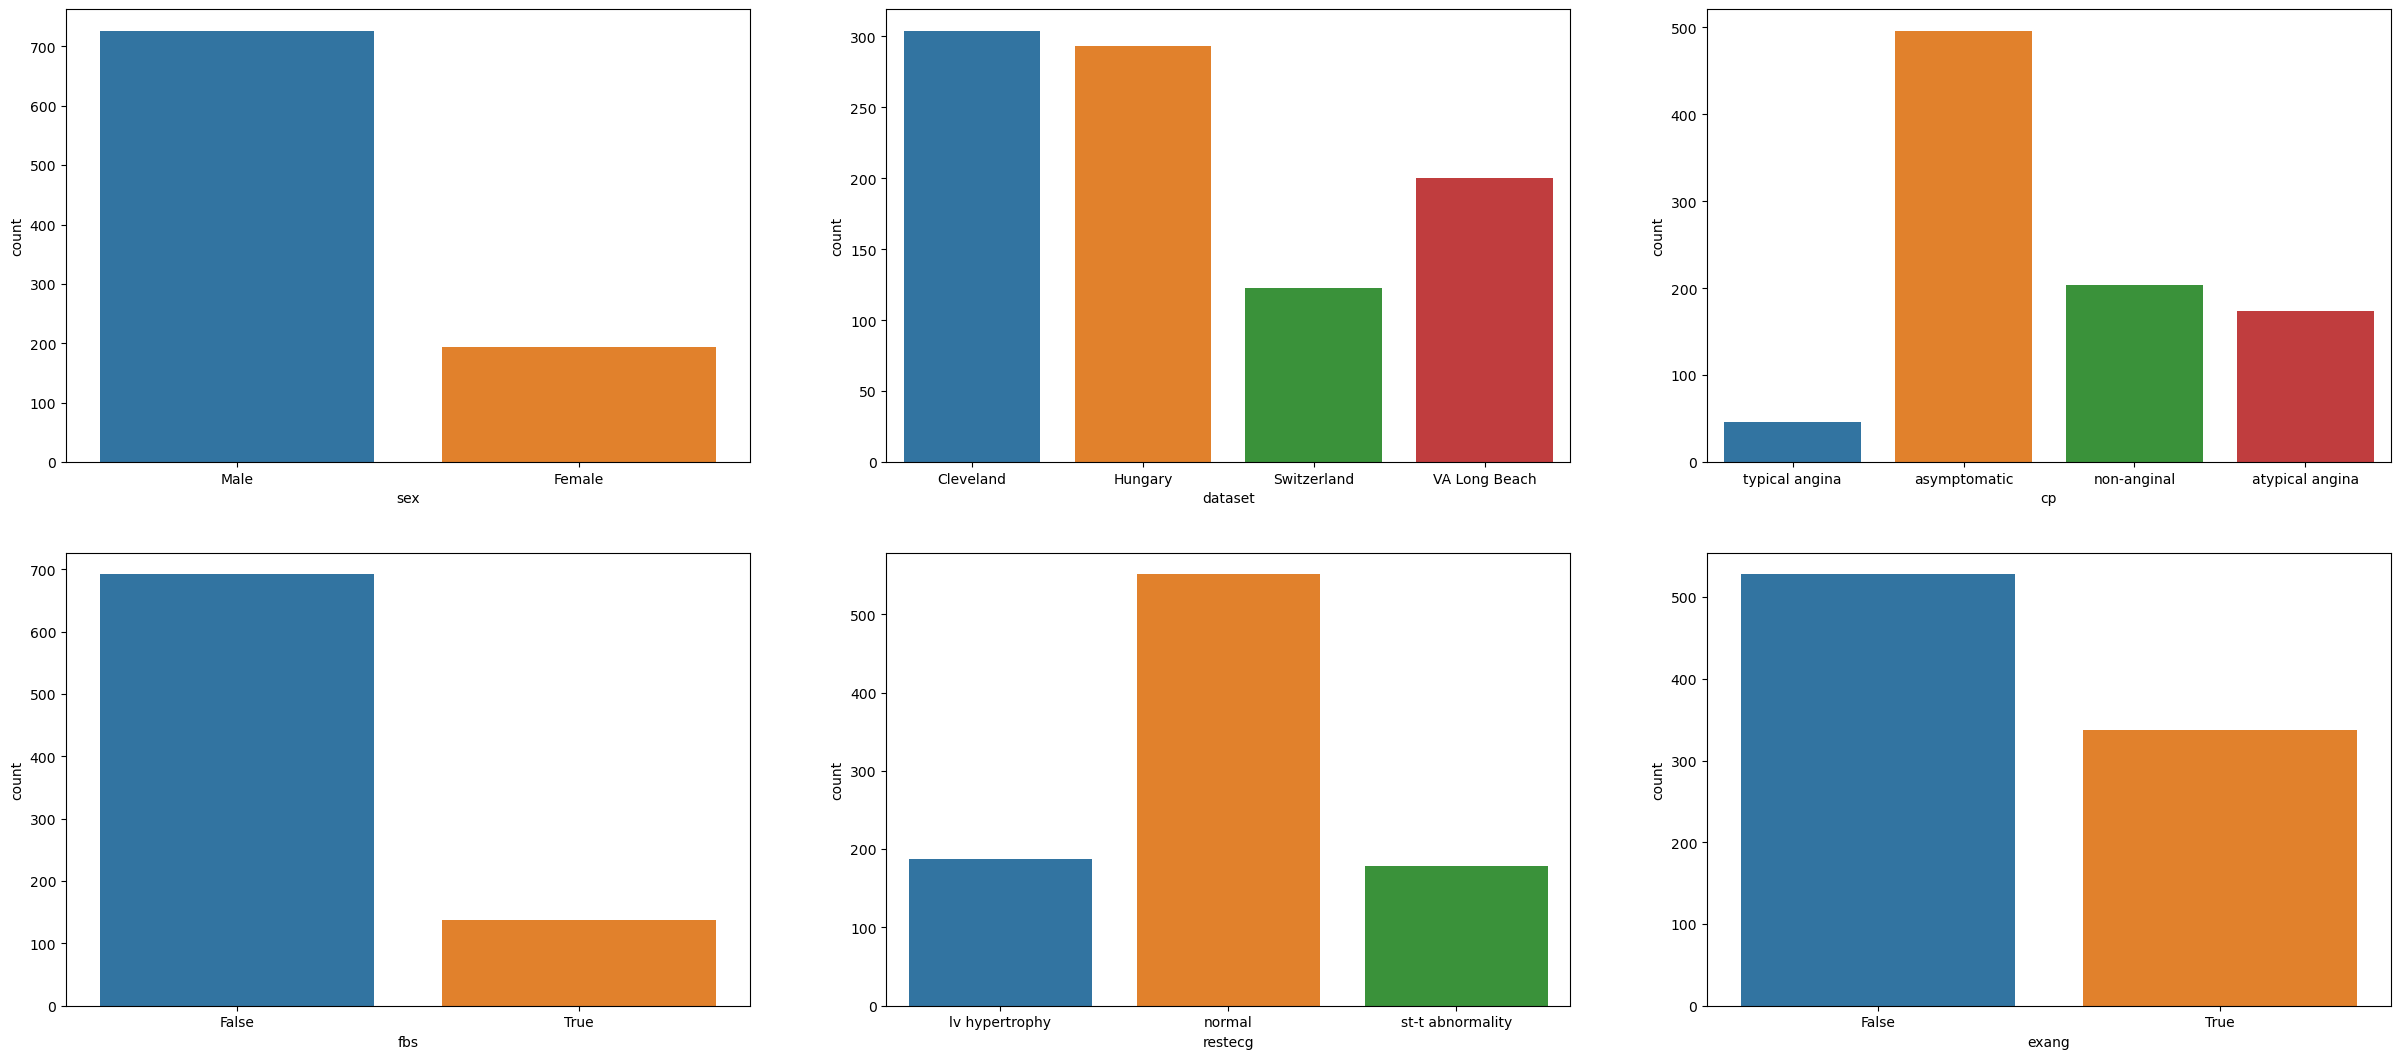

In [110]:
plt.figure(figsize=(30,20))

for index, value in enumerate(list(df1.select_dtypes(include='O').columns)):
    plt.subplot(3,3,index+1)
    sns.countplot(x=value, data=df1)

In [111]:
list(df1.select_dtypes(exclude='O').columns)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

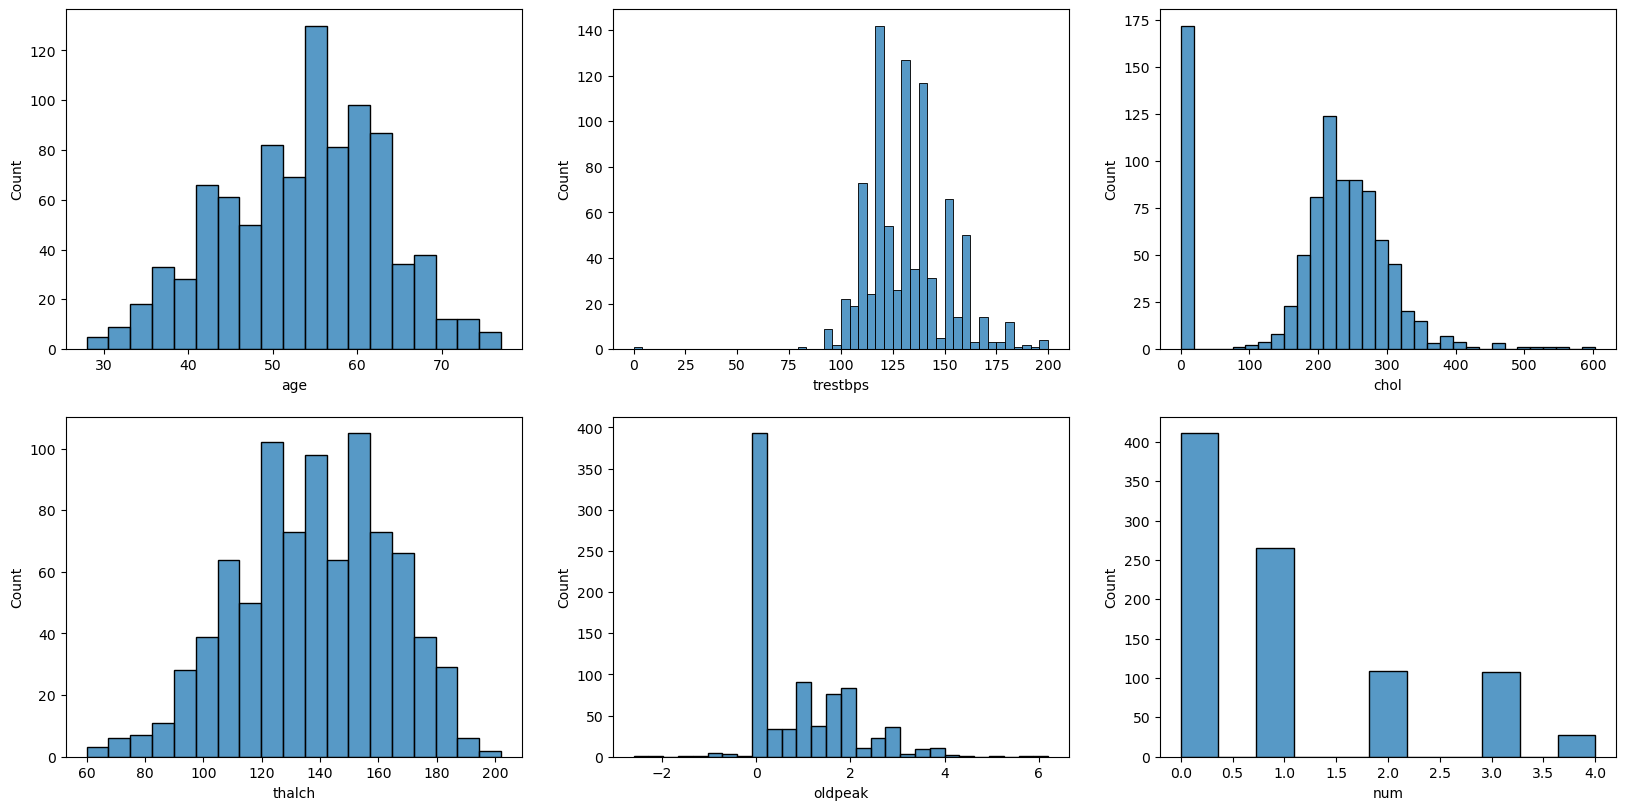

In [112]:
plt.figure(figsize=(20,15))

for index, value in enumerate(list(df1.select_dtypes(exclude='O').columns)):
    plt.subplot(3,3,index+1)
    sns.histplot(x=value, data=df1)

In [118]:
def main():
    (df1.isnull().sum()/len(df)*100).reset_index().set_index('index').sort_values(by=0, ascending=False).plot(kind='barh', 
                                                                                                         figsize=(15,6))
    plt.xlabel('Number of Missing values')
    plt.ylabel('Columns')
                                                                                                              

None


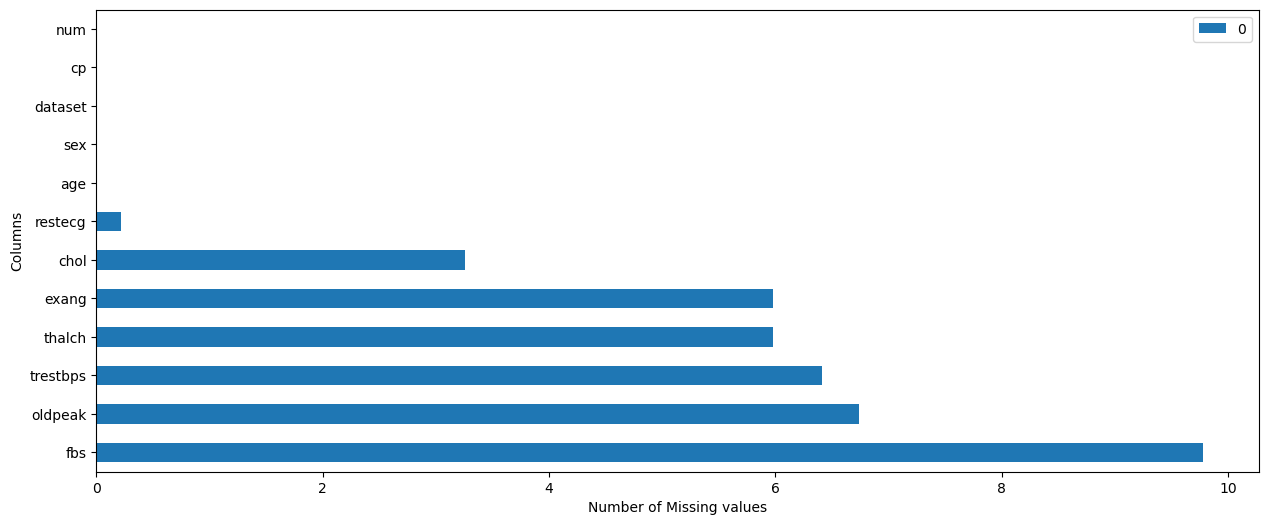

In [120]:
print(main())

In [128]:
df1[df1['restecg'].isnull()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
571,55,Male,Hungary,typical angina,140.0,295.0,False,NaN,136.0,False,0.0,1
598,34,Male,Switzerland,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,1


In [129]:
df1_copy = df1.copy()

In [134]:
df1 = df1.dropna(subset='restecg').reset_index(drop=True)

In [135]:
### check the data set rows before and after subset
print(f'The rows before {df1_copy.shape[0]}')
print(f'The rows before {df1.shape[0]}')

The rows before 920
The rows before 918


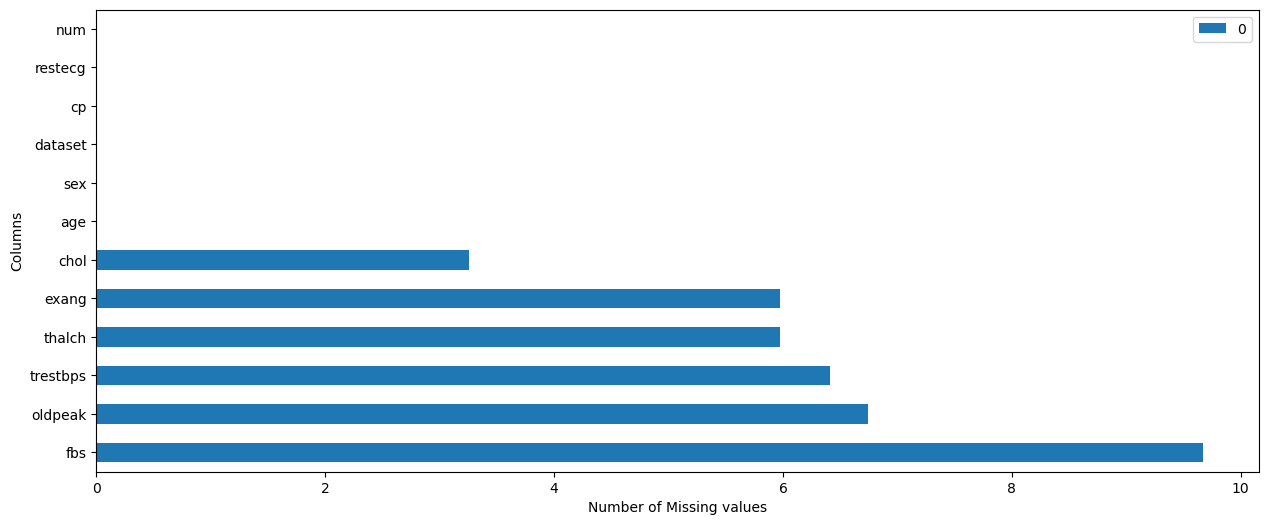

In [136]:
main()

#### Numerical data missing values

**Using Statistical method**

* Old peak

* trestbps

* thalch

* chol

<AxesSubplot:xlabel='oldpeak'>

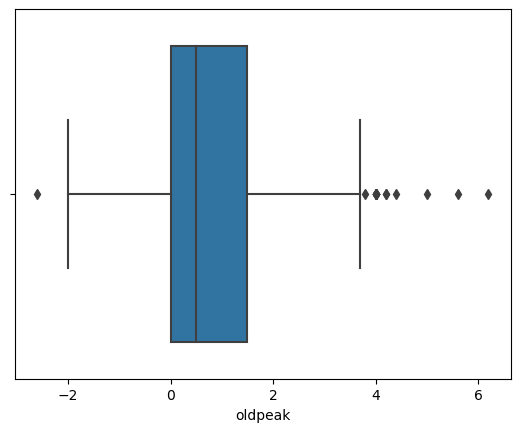

In [137]:
sns.boxplot(df1['oldpeak'])

In [142]:
df1[df1['oldpeak'].isnull()]['sex'].value_counts()

Male      61
Female     1
Name: sex, dtype: int64

In [143]:
df1['oldpeak'].describe()

count    856.000000
mean       0.880607
std        1.091840
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [145]:
df1.groupby('sex').describe()['oldpeak']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,193.0,0.668394,0.957202,0.0,0.0,0.0,1.1,6.2
Male,663.0,0.942383,1.121150,-2.6,0.0,0.6,1.8,5.6


It is ideal to fill the missing values with each sex median values

In [152]:
df1['oldpeak'] = df1.groupby('sex')['oldpeak'].transform(lambda x: x.fillna(x.median()))

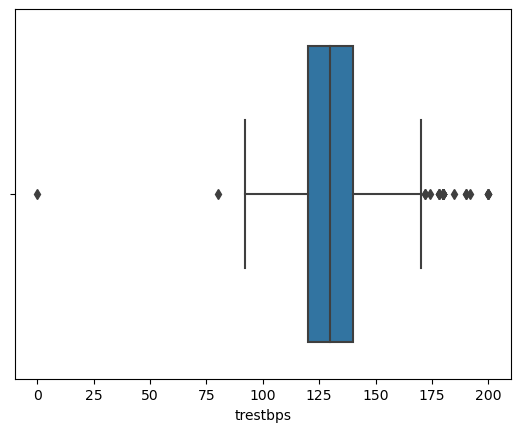

In [154]:
sns.boxplot(df1['trestbps']);

In [155]:
#Fill with median values
df1['trestbps'] = df1['trestbps'].fillna(df1['trestbps'].median())

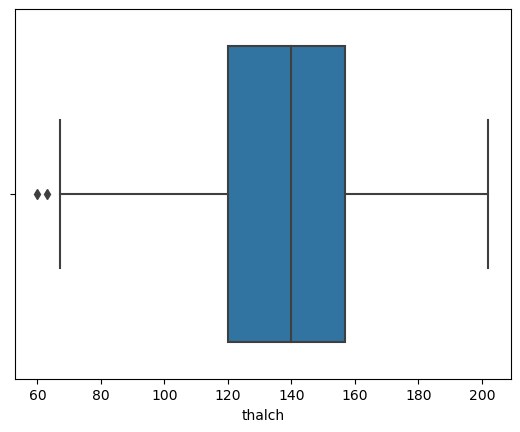

In [157]:
sns.boxplot(df1['thalch']);

In [158]:
df1['thalch'] = df1['thalch'].fillna(value=df1['thalch'].median())

fill with median values

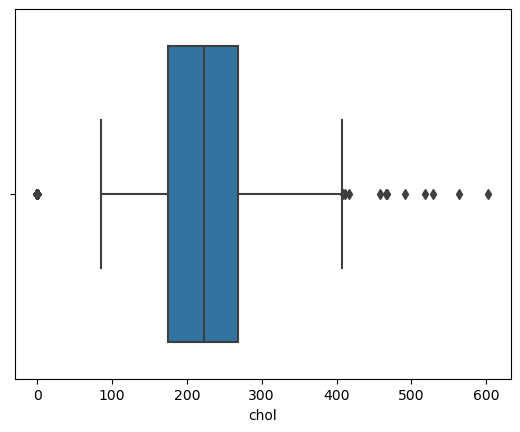

In [159]:
sns.boxplot(df1['chol']);

In [161]:
df1['chol'] = df1.groupby('sex')['chol'].transform(lambda x:x.fillna(x.median()))

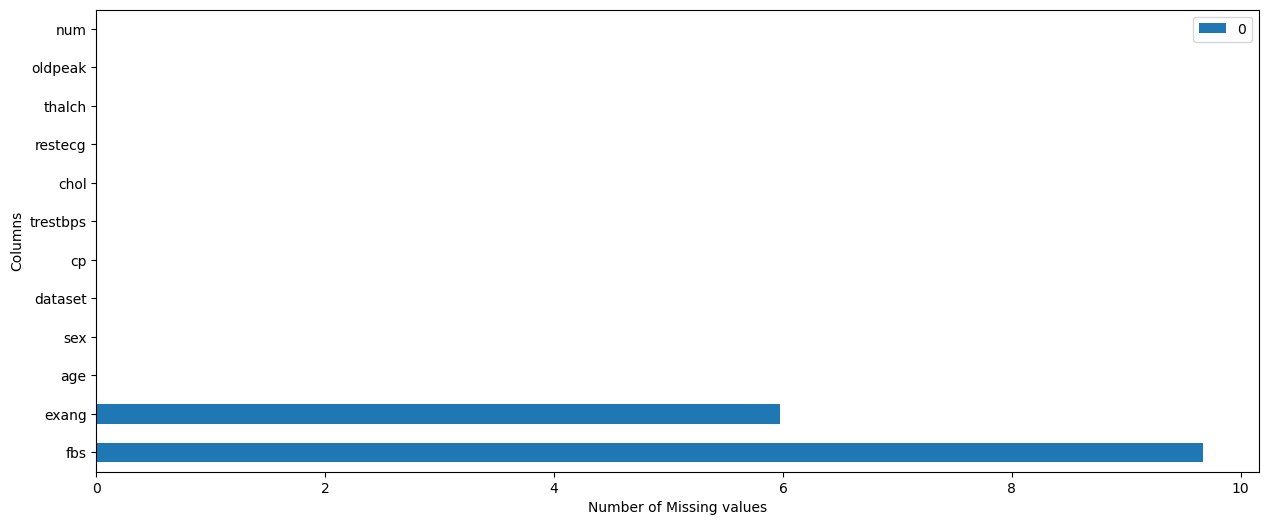

In [162]:
main()

In [174]:
list(df1.select_dtypes(include='O')[['fbs','exang']].columns)

['fbs', 'exang']

In [175]:
for category in list(df1.select_dtypes(include='O')[['fbs','exang']].columns):
    df1[category] = df1[category].fillna(df1[category].mode()[0])

In [179]:
df1.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [185]:
#sex for one hot encoding
df1 = pd.get_dummies(df1, columns=['sex'], drop_first=True)

In [186]:
df1['exang'] = df1['exang'].map({True:1,False:0})

In [189]:
#Label Encoding
lb = LabelEncoder()

df1['dataset'] = lb.fit_transform(df1['dataset'])

In [193]:
df1['fbs'] = lb.fit_transform(df1['fbs'])

#### Target encoding

In [198]:
tar_encoding = df1.groupby('cp').mean()['num'].to_dict()

In [199]:
tar_encoding

{'asymptomatic': 1.4444444444444444,
 'atypical angina': 0.1839080459770115,
 'non-anginal': 0.6617647058823529,
 'typical angina': 0.7111111111111111}

In [200]:
df1['cp'] = df1['cp'].map(tar_encoding)

In [202]:
def main(x):
    if x <35:
        return 'Young_adult'
    elif x>35 and x<65:
        return 'Adult'
    else:
        return 'Old_Age'

In [205]:
df1['age'].apply(lambda x : main(x)).value_counts()

Adult          784
Old_Age        114
Young_adult     20
Name: age, dtype: int64

In [206]:
df1['age_group'] = df1['age'].apply(lambda x : main(x))

In [207]:
df1

,age,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,sex_Male,age_group
0,63,0,0.711111,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,0,1,Adult
1,67,0,1.444444,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,2,1,Old_Age
2,67,0,1.444444,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,1,1,Old_Age
3,37,0,0.661765,130.0,250.0,0,normal,187.0,0,3.5,0,1,Adult
4,41,0,0.183908,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,0,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,54,3,1.444444,127.0,333.0,1,st-t abnormality,154.0,0,0.0,1,0,Adult
914,62,3,0.711111,130.0,139.0,0,st-t abnormality,140.0,0,0.6,0,1,Adult
915,55,3,1.444444,122.0,223.0,1,st-t abnormality,100.0,0,0.0,2,1,Adult
916,58,3,1.444444,130.0,385.0,1,lv hypertrophy,140.0,0,0.6,0,1,Adult


In [208]:
df1['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [209]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        918 non-null    int64  
 1   dataset    918 non-null    int32  
 2   cp         918 non-null    float64
 3   trestbps   918 non-null    float64
 4   chol       918 non-null    float64
 5   fbs        918 non-null    int64  
 6   restecg    918 non-null    object 
 7   thalch     918 non-null    float64
 8   exang      918 non-null    int64  
 9   oldpeak    918 non-null    float64
 10  num        918 non-null    int64  
 11  sex_Male   918 non-null    uint8  
 12  age_group  918 non-null    object 
dtypes: float64(5), int32(1), int64(4), object(2), uint8(1)
memory usage: 83.5+ KB


In [210]:
df1['restecg'] = lb.fit_transform(df1['restecg'])

In [211]:
df1.head()

,age,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,sex_Male,age_group
0,63,0,0.711111,145.0,233.0,1,0,150.0,0,2.3,0,1,Adult
1,67,0,1.444444,160.0,286.0,0,0,108.0,1,1.5,2,1,Old_Age
2,67,0,1.444444,120.0,229.0,0,0,129.0,1,2.6,1,1,Old_Age
3,37,0,0.661765,130.0,250.0,0,1,187.0,0,3.5,0,1,Adult
4,41,0,0.183908,130.0,204.0,0,0,172.0,0,1.4,0,0,Adult
